# Week 1: Mathematical Background

## Outline

* Linear Algebra
* Calculus
* Introduction to Curve Fitting
* Python Programming

In [56]:
# Imports used in this lesson

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_classification

# Linear Algebra Concepts

Linear algebra is the study of linear equations.
While linear algebra is a very robust and extensive field of mathematics, we will only need a little bit of the basic concepts for our purposes in this course.

## Scalars, Vectors, Matrices, and Tensors

Here we introduce the main definitions which we will be relying on.

---

**Scalars**, **vectors**, **matrices**, and **tensors** are mathematical objects that contain numbers.
We typically think of these objects as having numbers arranged in a particular way.


- A **scalar** is simply a single number and is zero-dimensional.
- A **vector** is an ordered list of numbers and is one-dimensional. A vector is similar to the programming idea of an array.
- A **matrix** is a two-dimensional collection of numbers, arranged in rows and columns. Each row and column of a matrix is itself a vector.
- A **tensor** is a three or more dimesional collection of numbers.

![Vector Martrix and Tensor](../images/vector_matrix_tensor.png)

---

### Notation

Scalars typically get variable names in italics: $x$.

Vectors get variable names with a small arrow above: $\vec{x}$.

Matrices and tensors get variable names with capitol letters: $X$.

#### A Note About the Term "Dimension"

Because machine learning is a field which combines several different disciplines (mathematics, statistics, and computer science to name a few) there are many ideas which have several names, depending on the context of who is talking and what they are talking about. Additionally, there are some terms that are used to mean several different things.
This situation is a common source of confusion for students, so we are drawing explicit attention to it here.

The word "dimension" is one of those words. In the above definitions, "dimension" means a count of the number of distinct indices into the object.

## Vectors 

Vectors are collections of values where the order matters (compare with an unordered set).


### Vector Operations

* Vector addition
* Vector-scalar product


### Scalar (Dot) Product

Given two vectors $\vec{a} = [a_1 \, a_2 \, ... \, a_N]$ and$\vec{b} = [b_1 \, b_2 \, ... \, b_N]$, the **scalar product** is defined as

$$\vec{a} \cdot \vec{b} := \sum_{i=1}^N a_ib_i$$

Note that this dot product only makes sense when $\vec{a}$ and $\vec{b}$ are the same length.

#### Example

Let $\vec{a} = [1, \, 2, \, -4]$ and $\vec{b} = [-1, \, 10, \, 3]$

Then $\vec{a} \cdot \vec{b} = 1 \cdot -1 + 2 \cdot 10 + -4 \cdot 3 = 7$.

### Vectors as "Direction"

We sometimes think of vectors as being arrows which point in a particular direction.
This can be useful when reasoning about vectors geometrically.
However, it can be difficult to visualize this once you start condisidering vectors with more than 3 entries.

### Fuctions Applied to a Vector

Sometimes, for the sake of making notation simpler, we will write a real-valued function $f$ applied to a vector $\vec{v}$ to mean the application of the function $f$ to each entry of $\vec{v}$:

$f(\vec{v}) = [f(v_1) \, f(v_2) \, ... \, f(v_N)].$

This is not typical in a linear algebra class, but is something we will do frequently in deep learning.

### Matrices

### 

# Calculus

## Derivatives

## Gradients

# Modeling

In this section, we will dive into modeling with data.
We will explore to basic modeling techniques: linear and logistic regression.
While not neural networks, these techniques will use a lot of the same skills which will come in handy once we delve into deep learning.

## Linear Regression

Linear regression is a modeling technique in which we predict a continuous response variable via a linear relationship between predictor variables:

$$f(\vec{x}) = \hat{y} = \beta + \sum_{i = 1}^N w_ix_i$$
Here the feature vector $\vec{x} = [x_1, ... x_N]$ contains $N$ inputs.
This is called _linear regression_ since in the case where $\vec{x}$ has only one element, the function turns into the equation of a straight line in the familiar slope-intercept form.

$$y = \beta + wx$$

Often in linear regression (and other models) the vector $\vec{w}$ is called the _weights vector_ and the value $\beta$ is called the _bias_.

### Examples of Regression Problems

* What is the value of a home based on square footage, number of rooms, etc?
* What will the closing stock price be for a company based on the stock price in the last five days?


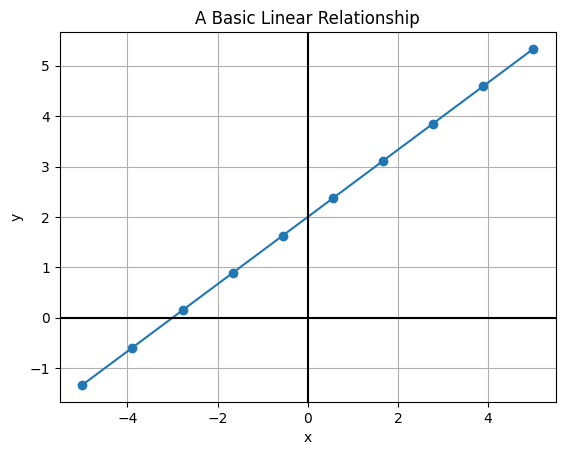

In [2]:
# Linear plot

x = np.linspace(-5, 5, 10)

# y = mx + b
y = (2/3) * x + 2

plt.plot(x, y)
plt.scatter(x, y)
plt.grid()
plt.title("A Basic Linear Relationship")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(c='k')
plt.axvline(c='k')

## Fitting a Model with Gradient Descent

Let's try fitting a linear regression model via gradient descent.
We first need to choose a loss function.
A reasonalble choice is the _mean square error_ or MSE:
$$MSE = \frac{1}{M}\sum_{j = 1}^M(\hat{y}_j - y_j)^2$$
where $\vec{y}$ is the vector containing the ground truth values, and $\hat{y}$ is the vector containing the predicted values.
If we write the MSE as a funciton of the _weights and bias_, we get this expression

$$J(\vec{w}, \beta) = \frac{1}{M}\sum_{j = 1}^M\left(\underbrace{\beta + \sum_{i = 1}^N w_ix_i}_{\hat{y_j}} - y_j \right)^2$$

(We typically use the letter $J$ to denote the loss function.)

Our goal here is to find the weight and bias parameters which minimize this MSE.
We do this by applying _gradient descent_ (GD):

1. Randomly initialize the weights and bias.
2. Compute the MSE
3. Compute the gradient of MSE with respect to $\vec{w}$ and $\beta$.
4. Update the weights and bias by subtracting a small ammount of the gradient.
5. Repeat steps 2-4 either a set number of times, or until convergence, i.e. the MSE is not updating any further.

### Stochastic Gradient Descent

One aspect of GD is that it requires you to calculate the loss function's value with respect to the entire training data.
In real world applications, this is often very expensive to compute.
To address this, we instead apply _stochastic gradient descent_, or SGD, a modification of GD.
The main difference is that we first break our training data into many small batches (sometimes called mini-batches)
and perform the gradient descent update step on each batch separately.
Batch size is susually something that has to be determined on a per-problem basis, which a few considerations:

* Small batches (1–32): More noise, better generalization, slower convergence.
* Medium batches (32–512): A balance between noise and stability, good convergence speed.
* Large batches (512+): Faster convergence but risks poor generalization and requires more memory.

A practical heuristic is to start with a medium batch size (e.g., 64 or 128) and adjust based on model performance, hardware constraints, and training stability. Gradient accumulation can also be used to simulate large batch sizes when hardware memory is limited.

Stochastic gradient descent has become the standard in how models are trained, and is sometimes just called "gradient descent."

### The Gradient of MSE for Linear Regression

For more complicated functions, the gradient would be very difficult to compute but luckily for linear regression it is quite easy:

$$\frac{\partial J}{\partial \beta} = \frac{2}{M}\cdot\sum_{j=1}^M \left(\beta + \sum_{i = 1}^N w_ix_i^{(j)} - y_j \right)$$
$$\frac{\partial J}{\partial w_i} = \frac{2}{M}\cdot\sum_{j=1}^M \left(\beta + \sum_{i = 1}^N w_ix_i^{(j)} - y_j \right)$$

With this precomputed gradient, we can implement a linear regression model from scratch in Python:

In [28]:
# Custom class to perform linear regression using stochastic gradient descent


class LinearRegressionSGD:
    def __init__(self, learning_rate: float = 0.01, epochs: int = 1000, batch_size: int = 10) -> None:
        """
        Initialize the Linear Regression model with Stochastic Gradient Descent (SGD).

        :param learning_rate: The step size for gradient descent updates.
        :param epochs: The number of times the entire dataset is used to update the weights.
        :param batch_size: The number of samples used in each gradient update (1 for pure SGD).
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights: np.ndarray | None = None
        self.bias: float = 0.0

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Train the linear regression model using stochastic gradient descent.

        :param X: The input features of shape (num_samples, num_features).
        :param y: The target values of shape (num_samples,).
        """
        assert len(X.shape) == 2, f"Feature matrix must have dim = 2, but given shape {X.shape}."
        assert len(y.shape) == 1, f"Target vector must have dim = 1, but given shape {y.shape}."
        
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)  # Initialize weights to zero (random would also be okay)
        self.bias = 0.0  # Initialize bias to zero

        for epoch in range(self.epochs):
            indices = np.random.permutation(num_samples)  # Shuffle data
            X_shuffled, y_shuffled = X[indices], y[indices]

            # Loop over batches
            for i in range(0, num_samples, self.batch_size):
                X_batch = X_shuffled[i : i + self.batch_size]
                y_batch = y_shuffled[i : i + self.batch_size]

                # Compute predictions
                y_pred = np.dot(X_batch, self.weights) + self.bias

                # Compute gradients
                error = y_pred - y_batch
                gradient_w = (2 / self.batch_size) * np.dot(X_batch.T, error)
                gradient_b = (2 / self.batch_size) * np.sum(error)

                # Update weights and bias
                self.weights -= self.learning_rate * gradient_w
                self.bias -= self.learning_rate * gradient_b

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Make predictions using the trained model.

        :param X: The input features of shape (num_samples, num_features).
        :return: The predicted values of shape (num_samples,).
        """
        if self.weights is None:
            raise ValueError("Model has not been trained yet. Call `fit` first.")
        return np.dot(X, self.weights) + self.bias

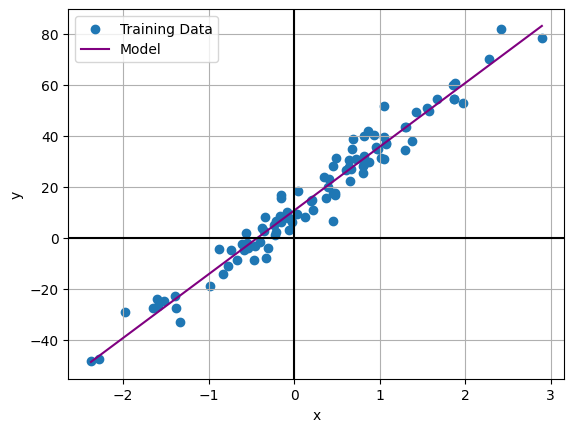

In [29]:
# Use scikit learn to generate some data

X, y = make_regression(n_samples=100, n_features=1, noise=5.0, bias=10.0)

linear_model = LinearRegressionSGD()
linear_model.fit(X, y)

# Plot the data and model

plt.scatter(X, y, label='Training Data')

x_extents = np.array([[X.min()], [X.max()]])
plt.plot(x_extents, linear_model.predict(x_extents), color='purple', label='Model')

plt.xlabel("x")
plt.ylabel("y")
plt.axhline(c='k')
plt.axvline(c='k')
plt.grid()

plt.legend()

## Fitting a Classification Model with Logistic Regression

The last model we will discuss today is logistic regression.
Logistic regression is used in cases where we want to predict the _class_ of an object from a finite number of possibilities, instead of a value.

### Examples of Classification Problems

* Is an e-mail spam or not spam?
* Is an image a picture of a cat or a dog?
* Which candiate will will an upcomming election?

### Logistic Regression Formula and the Sigmoid Function

Logistic regression works by the following formula:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where

$$z = \beta + \sum_{i = 1}^N w_ix_i$$

is just the linear function from earlier.

The function $\sigma$ is called the _sigmoid_ function and has some nice properties:

1. It has horizontal asymptotes at $y = 0$ and $y = 1$.
2. $\sigma(0) = 1/2$
3. The function is differentiable.

This means that we can interpred the output of the sigmoid function as a _probability_.
The fact that $\sigma$ is differentiable means that we can use it in SGD for modeling.

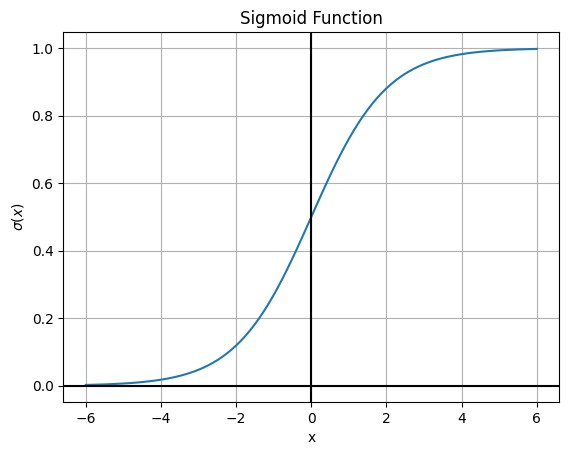

In [40]:
# Plot of the logistic function

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

xs = np.linspace(-6, 6, 100)
ys = sigmoid(xs)


plt.plot(xs, ys)
plt.title('Sigmoid Function')
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.axhline(c='k')
plt.axvline(c='k')
plt.grid()

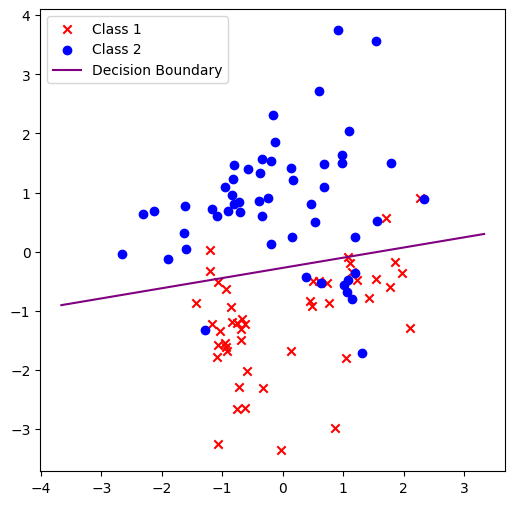

In [87]:
# Example of a logistic regression modeling problem


X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
)

# Here we will use the sklearn built in logistic regression model instead of building our own

lr_model = LogisticRegression()
lr_model.fit(X, y)

# Plot the training data and model's decision boundary

plt.figure(figsize=(6, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', c='red', label='Class 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', c='blue', label='Class 2')

# Extract the coefficients and intercept
w = lr_model.coef_[0]
b = lr_model.intercept_[0]

# Define x values (covering the data range)
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

# Compute corresponding y values for decision boundary (w1*x1 + w2*x2 + b = 0)
y_vals = -(w[0] * x_vals + b) / w[1]

# Plot the decision boundary
plt.plot(x_vals, y_vals, c='purple', label="Decision Boundary")
plt.legend()

# Summary of Our Discussion

